In [1]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt

In [2]:
warnings.simplefilter("ignore")

features = pd.read_csv('SCADA/features_T.csv')
labels = pd.read_csv('SCADA/labels_T.csv')
conditions = pd.read_csv('SCADA/condition_T.csv')

In [3]:
print(features.columns)
print(conditions.columns)
print(labels.columns)

Index(['Unnamed: 0', 'Rotordrehzahl', 'Leistung', 'Generator_Umdr', 'T_Aussen',
       'T_Gen1', 'T_Gen2', 'T_Getriebe', 'T_Getriebelager', 'T_Wellenlager',
       'Drehmoment', 'Triebstrangbeschl', 'T_Generatorkuehlluft',
       'T_Getriebelager_B'],
      dtype='object')
Index(['0.000000000000000000e+00'], dtype='object')
Index(['Unnamed: 0', 'Fehler_051', 'Fehler_052', 'Fehler_071', 'Fehler_072',
       'Fehler_077', 'Fehler_089', 'Fehler_098', 'Fehler_425'],
      dtype='object')


In [4]:
labels[labels==1].count()

Unnamed: 0      1
Fehler_051     13
Fehler_052    482
Fehler_071     32
Fehler_072      4
Fehler_077    208
Fehler_089     33
Fehler_098      5
Fehler_425      1
dtype: int64

In [5]:
features.head()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B
0,0,0.388821,-0.262396,0.372827,-0.182108,0.349576,0.333813,0.129720,0.253259,0.253259,-0.193027,-0.458352,0.314737,0.738088
1,1,0.390541,0.055554,0.372999,-0.243631,0.597289,0.568279,0.159978,0.253259,0.253259,0.294183,-0.358655,0.482893,0.738088
2,2,0.393981,0.101523,0.377180,-0.454949,0.575339,0.559795,0.241788,0.253259,0.253259,0.359708,-0.445023,0.293718,0.738088
3,3,0.414623,0.155153,0.397264,-0.583345,0.477352,0.467243,0.241788,0.253259,0.253259,0.425233,-0.330399,0.149900,0.738088
4,4,0.462787,0.247091,0.446921,-0.583345,0.380932,0.375462,0.309028,0.253259,0.253259,0.536731,-0.418366,0.025996,0.738088


In [6]:
#cond_feature=features+conditions

#cond_feature.head()

cond_f = features
cond_f['condition']=conditions

In [7]:
cond_f.loc[cond_f['condition']==1]

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,condition
49692,49692,-1.685663,-0.683777,-1.689376,-1.252072,-3.143491,-3.054375,-4.689180,-2.925996,-2.925996,-0.832952,-1.062660,-3.462137,0.738088,1.0
49695,49695,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
49699,49699,-1.685663,-0.679946,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832424,-1.062660,-3.351508,0.738088,1.0
49701,49701,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
49705,49705,-1.685663,-0.683777,-1.689376,-1.003306,-3.065101,-3.054375,-4.689180,-2.758667,-2.758667,-0.832952,-1.062660,-3.351508,0.738088,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794586,1794586,1.737407,5.108289,1.742125,0.952054,5.788287,5.890041,3.295626,0.815485,0.815485,4.383153,6.006174,4.892565,-0.399185,1.0
1794600,1794600,1.728807,4.824814,1.732503,1.021601,5.456696,5.536799,3.324763,1.089905,1.089905,4.131621,5.482369,4.826188,-0.399185,1.0
1794611,1794611,1.711605,4.660093,1.715358,1.155347,5.704409,5.799802,3.383038,1.257234,1.257234,3.993702,4.314804,5.056296,-0.399185,1.0
1797756,1797756,1.737407,5.184903,1.741571,0.612340,5.520193,5.630894,3.350539,0.420588,0.420588,4.449206,5.509559,4.579485,-0.399185,1.0


In [8]:
err_matrix = cond_f.loc[cond_f['condition'] == 1]

err_matrix.reset_index(drop=True, inplace = True)

In [9]:
good_matrix = cond_f.loc[cond_f['condition'] == 0]

good_matrix.reset_index(drop=True, inplace = True)


In [10]:
# save the data
err_matrix.to_csv('SCADA/error_f.csv', index=False)

good_matrix.to_csv('SCADA/good_f.csv', index=False)

# Hist Plots

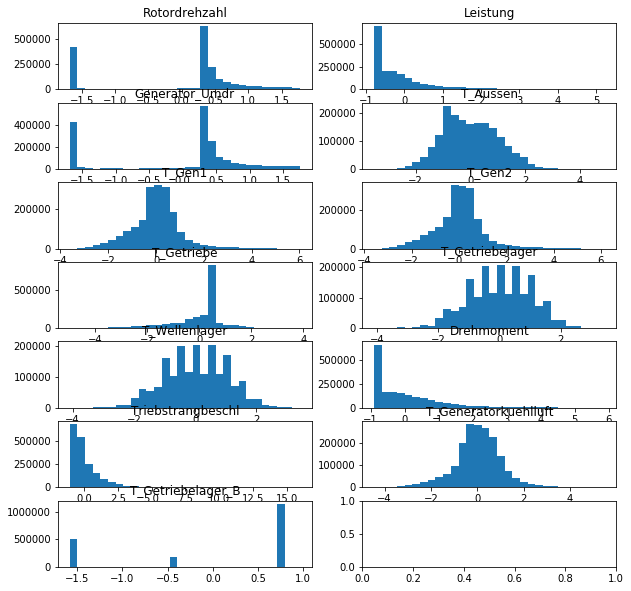

In [11]:
f,a = plt.subplots(7,2, figsize=(10,10))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx >= 13:
        break
    #print(idx, ax)
    ax.hist(features[features.columns.values[idx+1]], bins=30)
    
    ax.set_title(features.columns.values[idx+1])
    

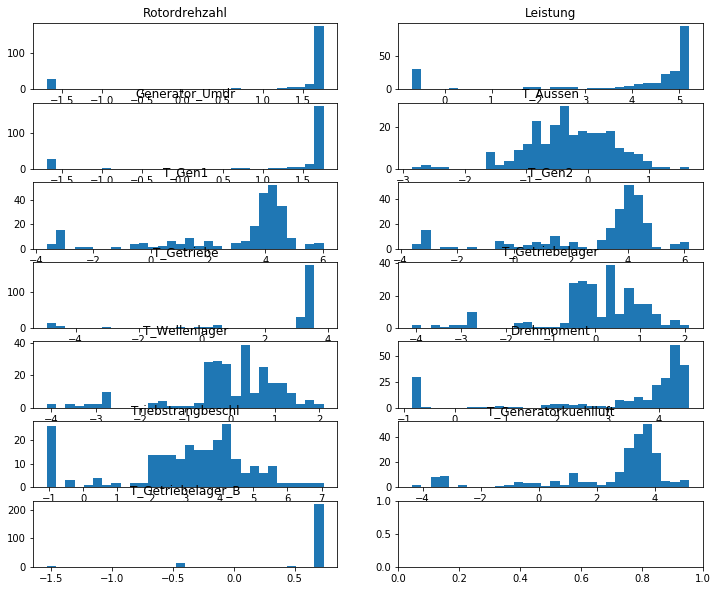

In [12]:
f,a = plt.subplots(7,2, figsize=(12,10))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx >= 13:
        break
    #print(idx, ax)
    ax.hist(err_matrix[err_matrix.columns.values[idx+1]], bins=30)
    
    ax.set_title(err_matrix.columns.values[idx+1])
    #ax.set_xlabel(xaxes[idx])
    #ax.set_ylabel(yaxes[idx])
    #plt.tight_layout()

In [13]:
4 - 7,8 

(-3, 8)

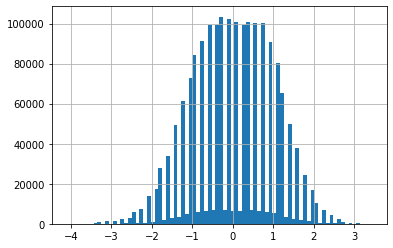

In [14]:
good_matrix['T_Getriebelager'].hist(bins=80)

# Work on Feature set

In [83]:
err_matrix['error_98'] = labels['Fehler_098']
err_matrix.head()

,Unnamed: 0,Rotordrehzahl,Leistung,Generator_Umdr,T_Aussen,T_Gen1,T_Gen2,T_Getriebe,T_Getriebelager,T_Wellenlager,Drehmoment,Triebstrangbeschl,T_Generatorkuehlluft,T_Getriebelager_B,condition,Tot_98,error_98
0,49692,-1.685663,-0.683777,-1.689376,-1.252072,-3.143491,-3.054375,-4.68918,-2.925996,-2.925996,-0.832952,-1.06266,-3.462137,0.738088,1.0,-25.669587,0
1,49695,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.68918,-2.758667,-2.758667,-0.832952,-1.06266,-3.351508,0.738088,1.0,-25.012164,0
2,49699,-1.685663,-0.679946,-1.689376,-1.118327,-3.065101,-3.054375,-4.68918,-2.758667,-2.758667,-0.832424,-1.06266,-3.351508,0.738088,1.0,-25.007805,0
3,49701,-1.685663,-0.683777,-1.689376,-1.118327,-3.065101,-3.054375,-4.68918,-2.758667,-2.758667,-0.832952,-1.06266,-3.351508,0.738088,1.0,-25.012164,0
4,49705,-1.685663,-0.683777,-1.689376,-1.003306,-3.065101,-3.054375,-4.68918,-2.758667,-2.758667,-0.832952,-1.06266,-3.351508,0.738088,1.0,-24.897143,0


In [18]:
err_matrix['Tot_98']=0
for idx,ax in enumerate(features[features.columns.values]):
    if idx == 14:
        break
    err_matrix['Tot_98'] = err_matrix['Tot_98']+ err_matrix[err_matrix.columns.values[idx+1]]
    
err_matrix['Tot_98'] = err_matrix['Tot_98']+labels['Fehler_071']

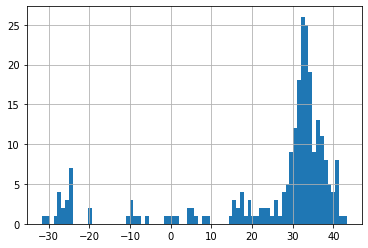

In [19]:
err_matrix['Tot_98'].hist(bins=80)

In [20]:
good_matrix['Tot_98']=0
for idx,ax in enumerate(features[features.columns.values]):
    if idx == 14:
        break
    good_matrix['Tot_98'] = good_matrix['Tot_98']+ good_matrix[good_matrix.columns.values[idx+1]]
    

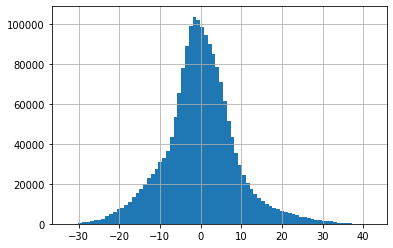

In [21]:
good_matrix['Tot_98'].hist(bins=80)

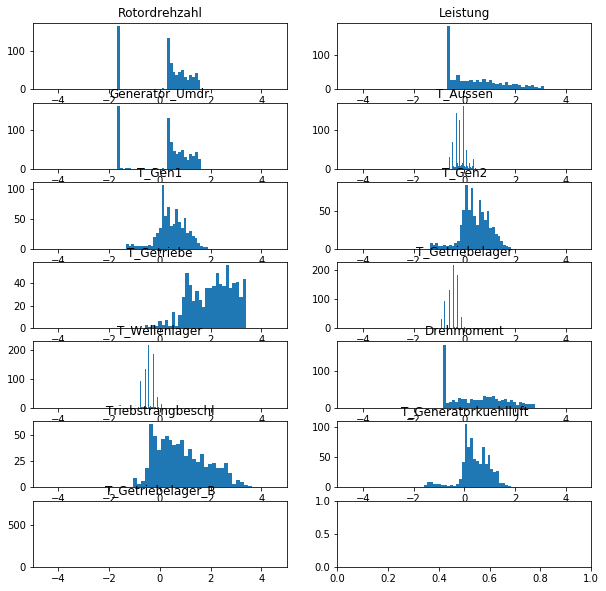

In [22]:
f,a = plt.subplots(7,2, figsize=(10,10))
a = a.ravel()
for idx,ax in enumerate(a):
    if idx >= 13:
        break
    #print(idx, ax)
    ax.hist(features[features.columns.values[idx+1]][993750:994500], bins=30)
    
    ax.set_title(features.columns.values[idx+1])
    ax.set_xlim([-5,5])

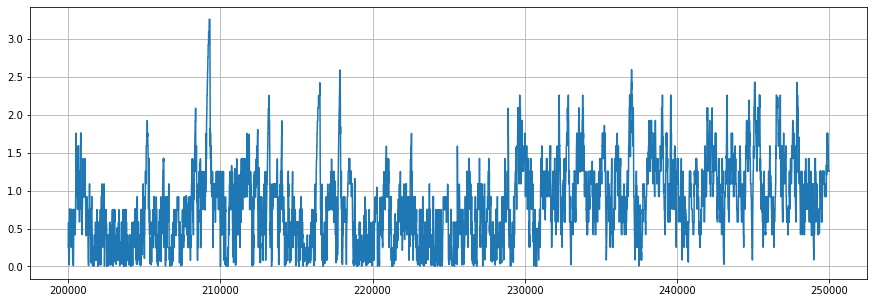

In [73]:
plt.subplots(figsize=(15,5))
plt.plot(np.abs(features['T_Wellenlager'][200000:250000]))
plt.grid()

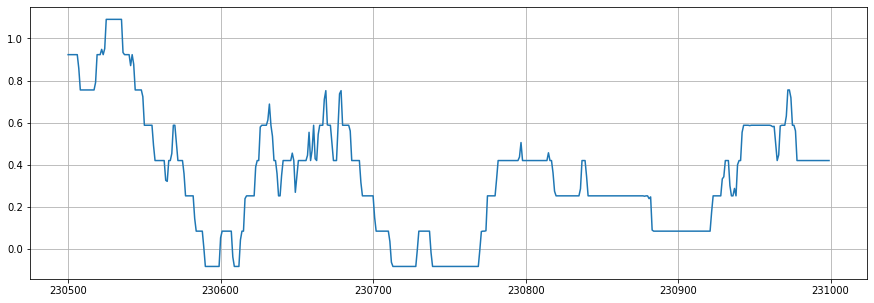

In [79]:
plt.subplots(figsize=(15,5))
plt.plot(features['T_Wellenlager'][230500:231000])
plt.grid()

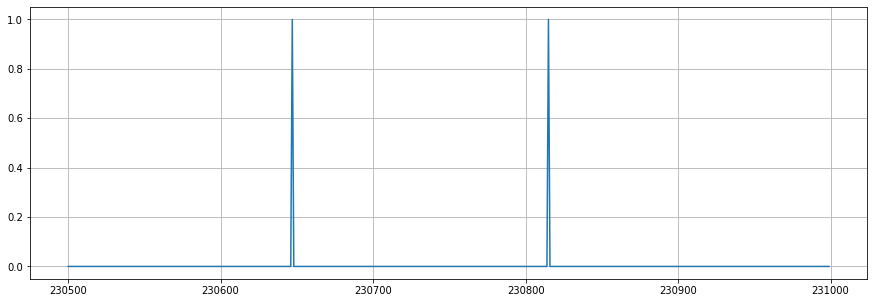

In [80]:
plt.subplots(figsize=(15,5))
#plt.plot(cond_f['condition'][993750:994500])
plt.plot(features['Fehler_098'][230500:231000])
plt.grid()

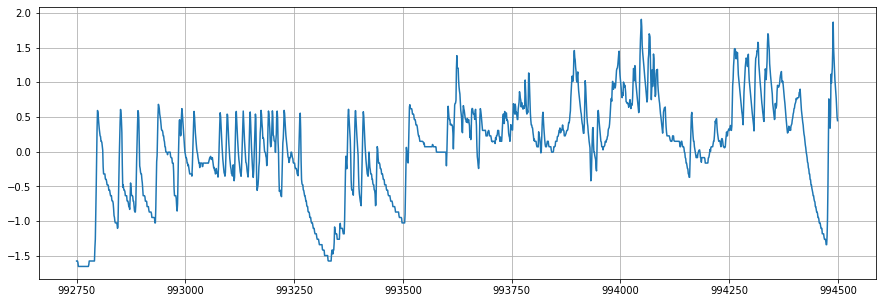

In [25]:
plt.subplots(figsize=(15,5))
plt.plot(features['T_Gen1'][992750:994500])
plt.grid()

In [26]:
temp = pd.DataFrame()
temp['T_Getriebelager_1'] =features['T_Getriebelager'][0:50000]

temp = pd.concat([temp, good_matrix['T_Getriebelager'][0:50000]], axis=1)

In [27]:
temp

,T_Getriebelager_1,T_Getriebelager
0,0.253259,0.253259
1,0.253259,0.253259
2,0.253259,0.253259
3,0.253259,0.253259
4,0.253259,0.253259
...,...,...
49995,-0.416058,-0.283868
49996,-0.516456,-0.248729
49997,-0.583387,-0.098133
49998,-0.548248,-0.081400


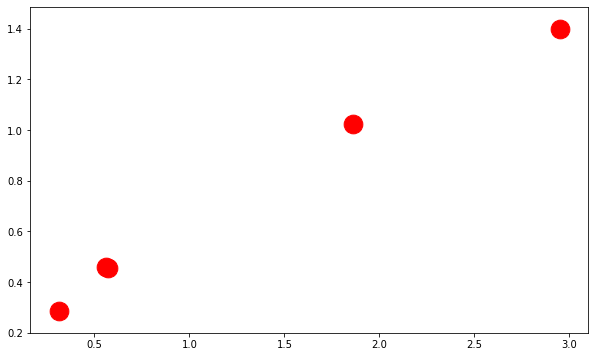

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
a = features.loc[features['Fehler_098'] == 1,['T_Gen1','T_Getriebelager']] #anomaly

#ax.plot(features['T_Gen1'], features['T_Getriebelager'], color='blue')
ax.scatter(a['T_Gen1'],a['T_Getriebelager'], color='red', s=350)
plt.show();

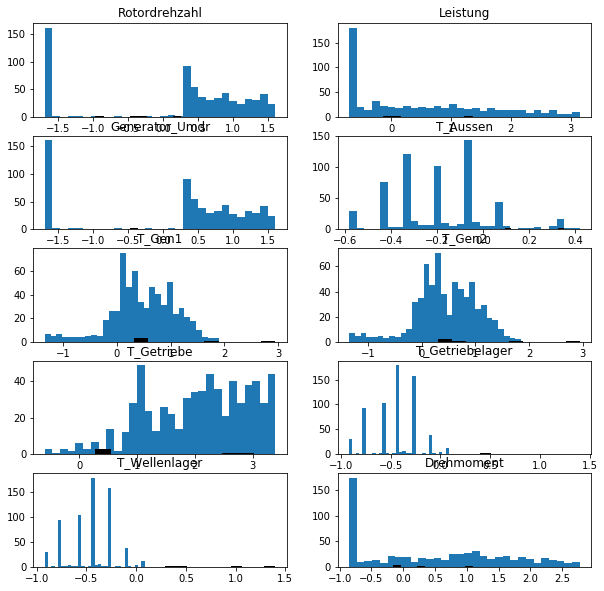

In [81]:
f,aa = plt.subplots(5,2, figsize=(10,10))
aa = aa.ravel()
for idx,ax in enumerate(aa):
    if idx >= 10:
        break
    #print(idx, ax)
    a = features.loc[features['Fehler_098'] == 1,[features.columns.values[idx+1],features.columns.values[idx+2]]] #anomaly

    #ax.plot(features['T_Gen1'], features['T_Getriebelager'], color='blue')
    
    ax.hist(features[features.columns.values[idx+1]][993850:994500], bins=30)
    ax.hist(a[features.columns.values[idx+1]], color='black')
    ax.set_title(features.columns.values[idx+1])
    #ax.set_xlim([-5,5])